In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from master import graph

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.shape

(2000, 9)

In [4]:
# Separate dependent & Independent features

x = df.drop('Outcome', axis=1)
y = df.Outcome

## <font color='red'>Check for Datatypes</font>

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## <font color='red'>Missing Value</font>

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

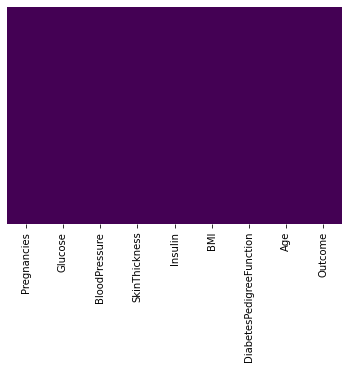

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Whole dataset doesn't have any missing value

## <font color='red'>Feature Insights</font>

<AxesSubplot:xlabel='Outcome', ylabel='count'>

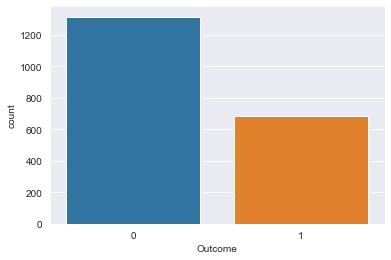

In [37]:
sns.set_style('darkgrid') # whitegrid style shows a white box to analyse
sns.countplot(x='Outcome', data=df)

In [11]:
df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

*Our Dataset is imbalanced*

<AxesSubplot:xlabel='Outcome', ylabel='count'>

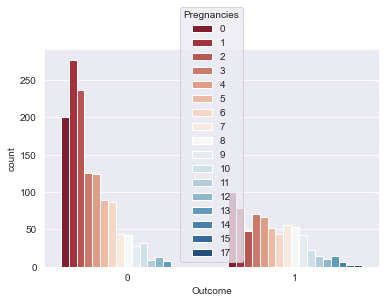

In [38]:
sns.set_style('darkgrid')
sns.countplot(x='Outcome', hue='Pregnancies', data=df, palette=style.seaborn_palettes()[5])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

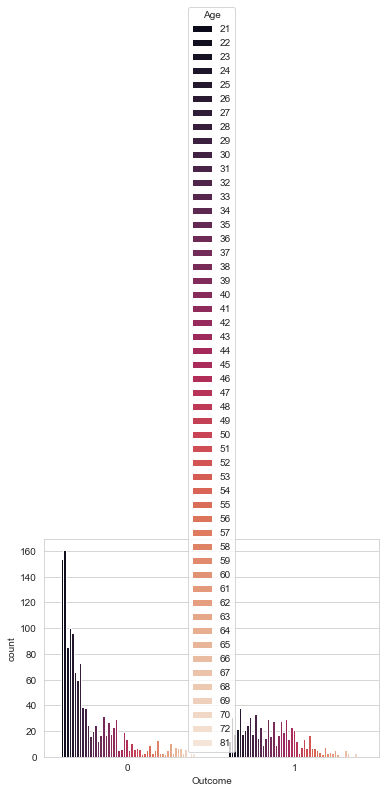

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome', hue='Age', data=df, palette=style.seaborn_palettes()[15])

## <font color='red'>Let's check for distribution</font>

In [14]:
from master import graph, style

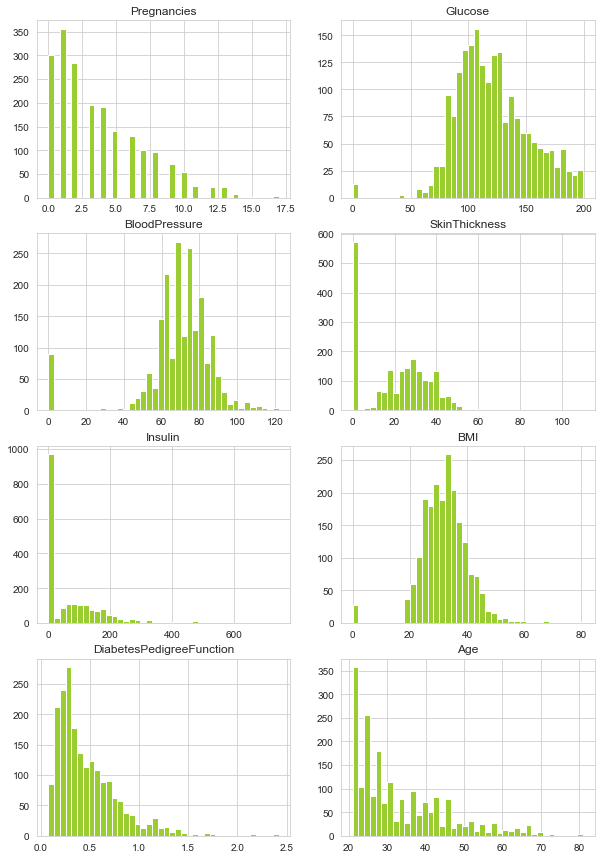

In [15]:
graph.plot_hist(df, x.columns, (10, 15), color='yellowgreen')

Few of the features distributed in skew manner. So we'll convert them into Gaussian distribution.

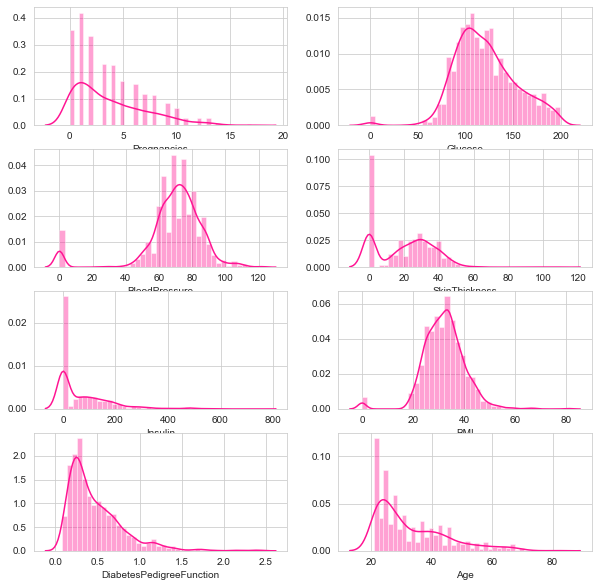

In [16]:
graph.plot_dist(df, x.columns, color='deeppink')

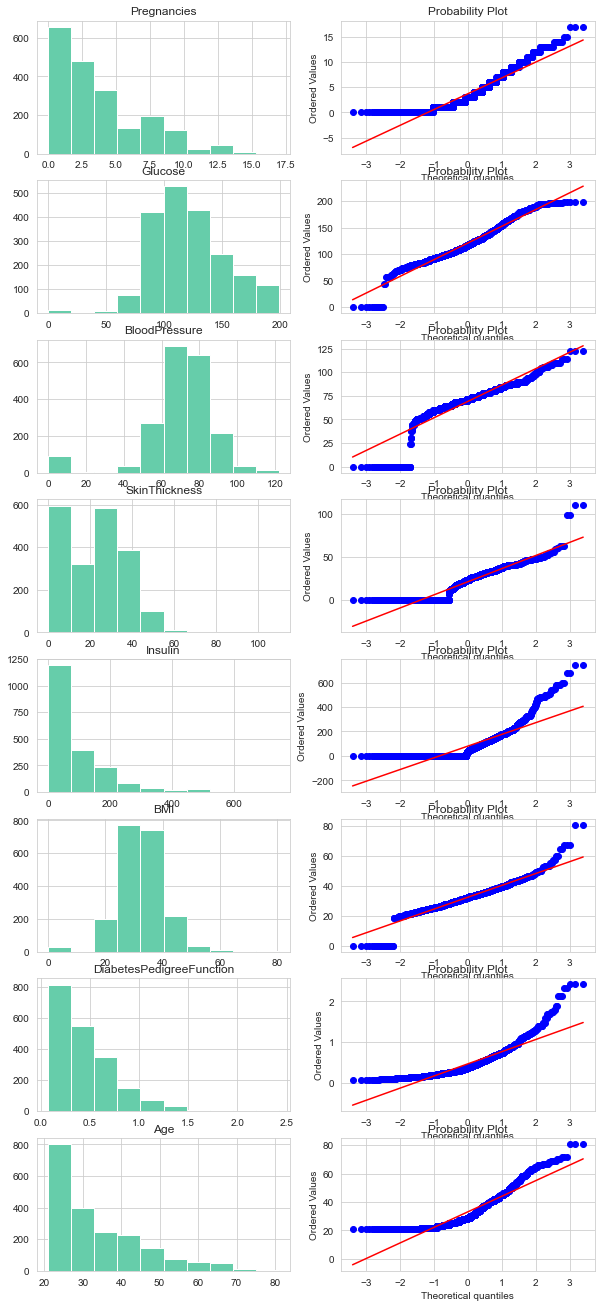

In [45]:
graph.plot_QQ(df, x.columns, (10, 23), bins=10, color=style.color_blue()[0])

## <font color='red'>Outliers</font>

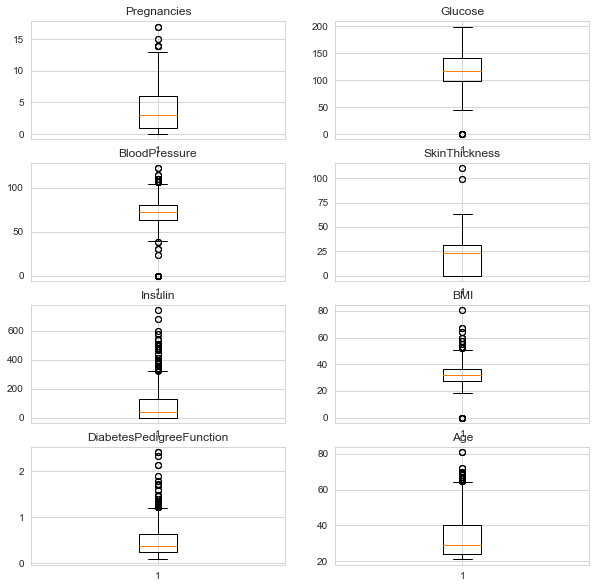

In [18]:
graph.plot_box(df, x.columns)

Above figure show that all columns has outlier. with Glucose having minimum number of outliers.

## <font color='red'>Correlation</font>

In [19]:
import seaborn as sns

<AxesSubplot:>

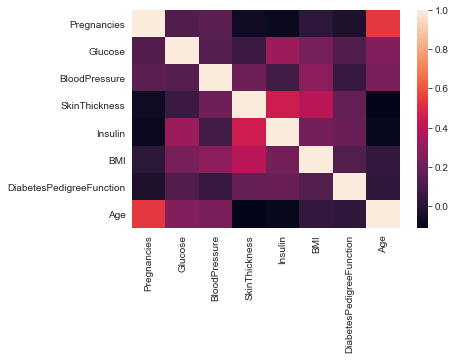

In [20]:
sns.heatmap(x.corr())

In [21]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

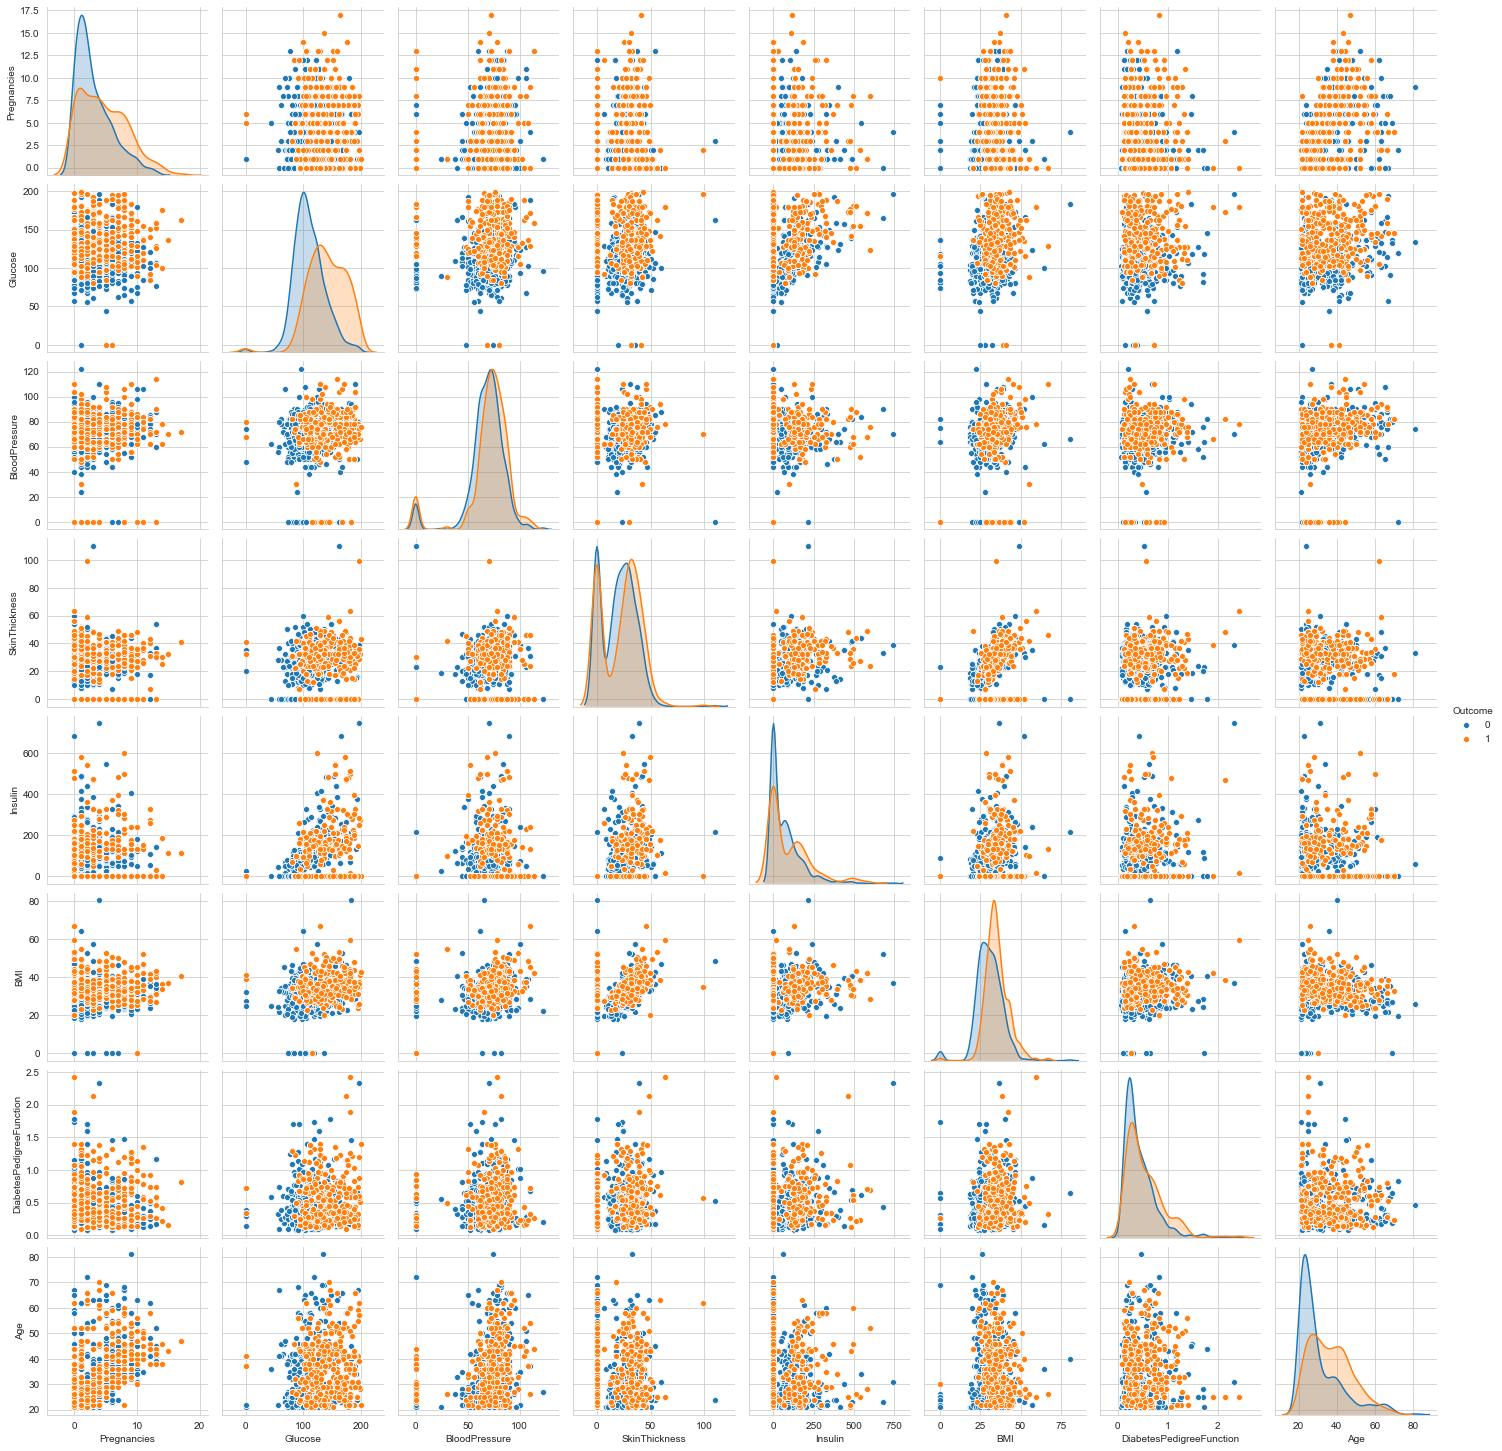

In [22]:
sns.pairplot(data=df, x_vars=x.columns, y_vars=x.columns, hue='Outcome')

In [23]:
from master import correlation

In [26]:
_, cols = correlation.corr(df)
cols

set()

Here no column has correlation more than 90%. So all columns are important.